Loading Prosper Data...

📊 DATASET INSPECTION: PROSPER (Brain 1: Pricing Engine)
1. Shape Check:
   - Features (X): (990572, 21)
   - Target (y):   (990572, 1)

2. Target Balance ('Accepted'):
Accepted
1   74.37%
0   25.63%

3. Data Cleanliness:
   ✅ CLEAN: No missing values found.

4. Engineered Features Check:
   ✅ Found: ['risk_score_norm', 'loan_to_income', 'clv_segment_High']
   - Risk Score Range: -0.55 to 1.05

5. Data Snapshot (First 3 Rows):


,OfferedRate,LoanOriginalAmount,Term,ProsperScore,CreditScoreRangeLower,DebtToIncomeRatio,StatedMonthlyIncome,IsBorrowerHomeowner,risk_score_norm,loan_to_income,relationship_depth_years,EmploymentStatus_Full-time,EmploymentStatus_Not available,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,clv_segment_Medium,clv_segment_High,price_sensitivity_proxy_Low_Sensitivity
0,0.2500,3000,36,0.0,620.0,0.40,833.333333,0,0.581818,0.3000,3.136986,False,False,False,False,True,False,False,False,False,True
1,0.2199,12000,36,7.0,740.0,0.00,2083.333333,0,0.800000,0.4800,10.561644,False,False,False,False,False,False,False,False,True,True
2,0.1350,1500,36,0.0,700.0,0.03,3333.333333,0,0.727273,0.0375,10.509589,True,False,False,False,False,False,False,False,False,True




Loading LendingClub Data...

📊 DATASET INSPECTION: LENDING CLUB (Brain 2: Risk Engine)
1. Shape Check:
   - Features (X): (807210, 80)
   - Target (y):   (807210, 1)

2. Target Balance ('target'):
target
0   80.04%
1   19.96%

3. Data Cleanliness:
   ✅ CLEAN: No missing values found.

4. Engineered Features Check:
   ✅ Found: ['risk_score_norm', 'loan_to_income', 'clv_segment_High']
   - Risk Score Range: 0.65 to 0.99

5. Data Snapshot (First 3 Rows):


,loan_amnt,term_years,int_rate,installment,annual_inc,dti,revol_util,revol_bal,total_acc,risk_score_norm,loan_to_income,relationship_depth_years,grade,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,clv_segment_Medium,clv_segment_High,price_sensitivity_proxy_Low_Sensitivity
0,35000.0,3.0,19.99,1300.55,205000.0,11.94,73.5,117831.0,21.0,0.663636,0.170732,11.254795,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
1,14000.0,3.0,5.32,421.61,250000.0,7.92,41.2,36293.0,48.0,0.790909,0.056000,23.517808,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,7000.0,3.0,12.29,233.48,57386.0,14.24,46.0,5339.0,21.0,0.745455,0.121981,17.095890,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


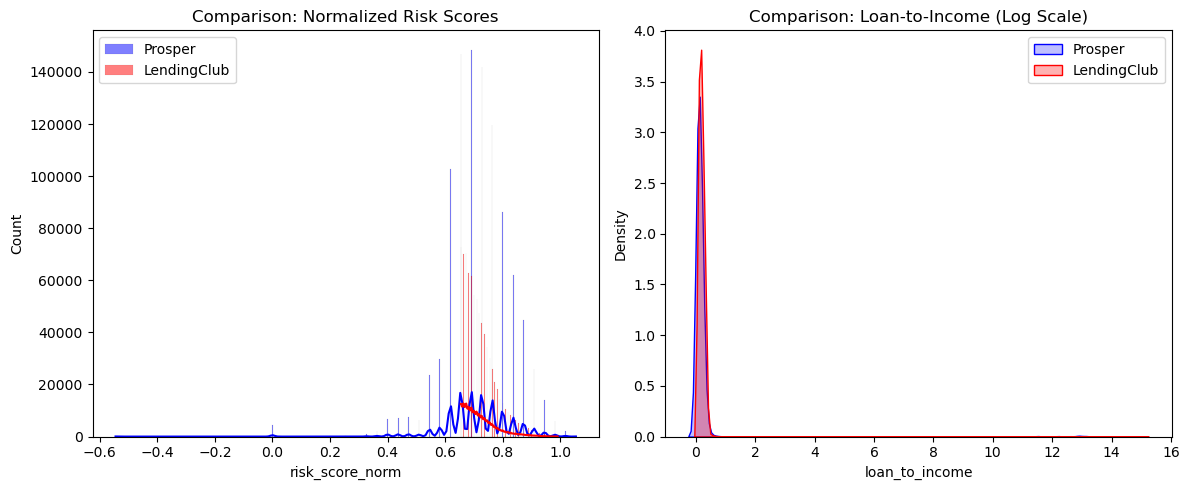

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration: Set display options to see all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)


def inspect_data_state(dataset_name, x_path, y_path):
    """
    Loads training data and generates a 'Health Report'
    to verify it's ready for modeling.
    """
    print(f"\n{'='*60}")
    print(f"📊 DATASET INSPECTION: {dataset_name}")
    print(f"{'='*60}")

    try:
        # 1. Load Data
        X = pd.read_csv(x_path)
        y = pd.read_csv(y_path)

        # 2. Shape & Integrity
        print(f"1. Shape Check:")
        print(f"   - Features (X): {X.shape}")
        print(f"   - Target (y):   {y.shape}")

        # 3. Target Distribution (Balance Check)
        target_col = y.columns[0]
        balance = y[target_col].value_counts(normalize=True) * 100
        print(f"\n2. Target Balance ('{target_col}'):")
        print(balance.to_string(float_format="%.2f%%"))

        # 4. Missing Value Check (Critical for XGBoost/Logistic)
        total_nulls = X.isnull().sum().sum()
        print(f"\n3. Data Cleanliness:")
        if total_nulls == 0:
            print("   ✅ CLEAN: No missing values found.")
        else:
            print(f"   ⚠️ WARNING: Found {total_nulls} missing values!")
            print(X.isnull().sum()[X.isnull().sum() > 0])

        # 5. Feature Engineering Verification
        # Check if our key engineered features exist
        key_features = ["risk_score_norm", "loan_to_income", "clv_segment_High"]
        present_features = [f for f in key_features if f in X.columns]

        print(f"\n4. Engineered Features Check:")
        if len(present_features) > 0:
            print(f"   ✅ Found: {present_features}")
            # Show stats for Risk Score
            if "risk_score_norm" in X.columns:
                print(
                    f"   - Risk Score Range: {X['risk_score_norm'].min():.2f} to {X['risk_score_norm'].max():.2f}"
                )
        else:
            print("   ❌ Key features missing! Did feature engineering run?")

        # 6. Sample Rows
        print(f"\n5. Data Snapshot (First 3 Rows):")
        display(X.head(3))

        return X, y

    except FileNotFoundError:
        print(
            f"❌ ERROR: Could not find files at {x_path}. Did you run the 'Save' block?"
        )
        return None, None


# =========================================================
# RUN INSPECTION
# =========================================================

# A. Inspect PROSPER (Price Elasticity Data)
# ---------------------------------------------------------
print("Loading Prosper Data...")
X_prosper, y_prosper = inspect_data_state(
    "PROSPER (Brain 1: Pricing Engine)",
    "data/processed/prosper_X_train.csv",
    "data/processed/prosper_y_train.csv",
)

# B. Inspect LENDINGCLUB (Risk Data)
# ---------------------------------------------------------
# Note: Ensure you adjust file names if you saved them differently
print("\n\nLoading LendingClub Data...")
X_lc, y_lc = inspect_data_state(
    "LENDING CLUB (Brain 2: Risk Engine)",
    # Assuming you saved the LC data using the code provided previously.
    # If you haven't saved LC data yet, verify the variable names in memory instead.
    "data/processed/lending_club_X_train.csv",
    "data/processed/lending_club_y_train.csv",
)

# =========================================================
# VISUAL COMPARISON (Optional)
# =========================================================
if X_prosper is not None and X_lc is not None:
    plt.figure(figsize=(12, 5))

    # Compare Risk Score Distributions
    plt.subplot(1, 2, 1)
    sns.histplot(X_prosper["risk_score_norm"], color="blue", label="Prosper", kde=True)
    sns.histplot(
        X_lc["risk_score_norm"], color="red", label="LendingClub", kde=True, alpha=0.5
    )
    plt.title("Comparison: Normalized Risk Scores")
    plt.legend()

    # Compare Loan to Income
    plt.subplot(1, 2, 2)
    sns.kdeplot(
        np.log1p(X_prosper["loan_to_income"]), color="blue", label="Prosper", fill=True
    )
    sns.kdeplot(
        np.log1p(X_lc["loan_to_income"]),
        color="red",
        label="LendingClub",
        fill=True,
        alpha=0.3,
    )
    plt.title("Comparison: Loan-to-Income (Log Scale)")
    plt.legend()

    plt.tight_layout()
    plt.show()